## Лабораторная работа № 3. Exploratory Data Analysis и линейная регрессия


### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а также привыкнем к основным понятиям машинного обучения.

<strong style="color: red">Внимание!</strong> В этом ноутбуке используется библиотека `ipyleaflet`. Чтобы ее установить так, чтобы она работала, нужно совершить 2 простых шага:

In [2]:
# %%bash
# pip3 install ipyleaflet
# jupyter nbextension enable --py --sys-prefix ipyleaflet

После этого перезапустите сессию (не `Restart Kernel`, а нажмите `Ctrl+C` в терминале, где вы запускали ноутбук, и запустите заново). Лучше это сделать сразу, чтобы потом не пришлось прерывать сессию и терять промежуточные результаты работы. Если все сделано правильно, вы должны увидеть карту Москвы, выполнив ячейку ниже:

In [3]:
!pip install ipyleaflet

In [4]:
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Traceback (most recent call last):
  File "C:\Users\Egor\anaconda3\Scripts\jupyter-nbextension-script.py", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\Egor\anaconda3\Lib\site-packages\jupyter_core\application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Egor\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Egor\anaconda3\Lib\site-packages\notebook\nbextensions.py", line 972, in start
    super().start()
  File "C:\Users\Egor\anaconda3\Lib\site-packages\jupyter_core\application.py", line 266, in start
    self.subapp.start()
  File "C:\Users\Egor\anaconda3\Lib\site-packages\notebook\nbextensions.py", line 882, in start
    self.toggle_nbextension_python(self.extra_args[0])
  File "C:\Users\Egor\anaconda3\Lib\site-packages\notebook\nbextensions.py", line 855, in t

In [5]:
from ipyleaflet import Map, basemaps
Map(center=(55.7522200, 37.6155600), zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

Map(center=[55.75222, 37.61556], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


%matplotlib inline

sns.set(style="darkgrid")

## Часть 0.

**Задание 1.**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [7]:
data = pd.read_csv('train.csv')
print(data)
data.describe()

                id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [8]:
data = data.drop(columns=['dropoff_datetime'])# Удаление колонки dropoff_datetime
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])# Преобразование pickup_datetime в формат datetime
print(data)
data.describe()

                id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415    

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Разбейте выборку на обучающую и тестовую в отношении 7:3.

In [9]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

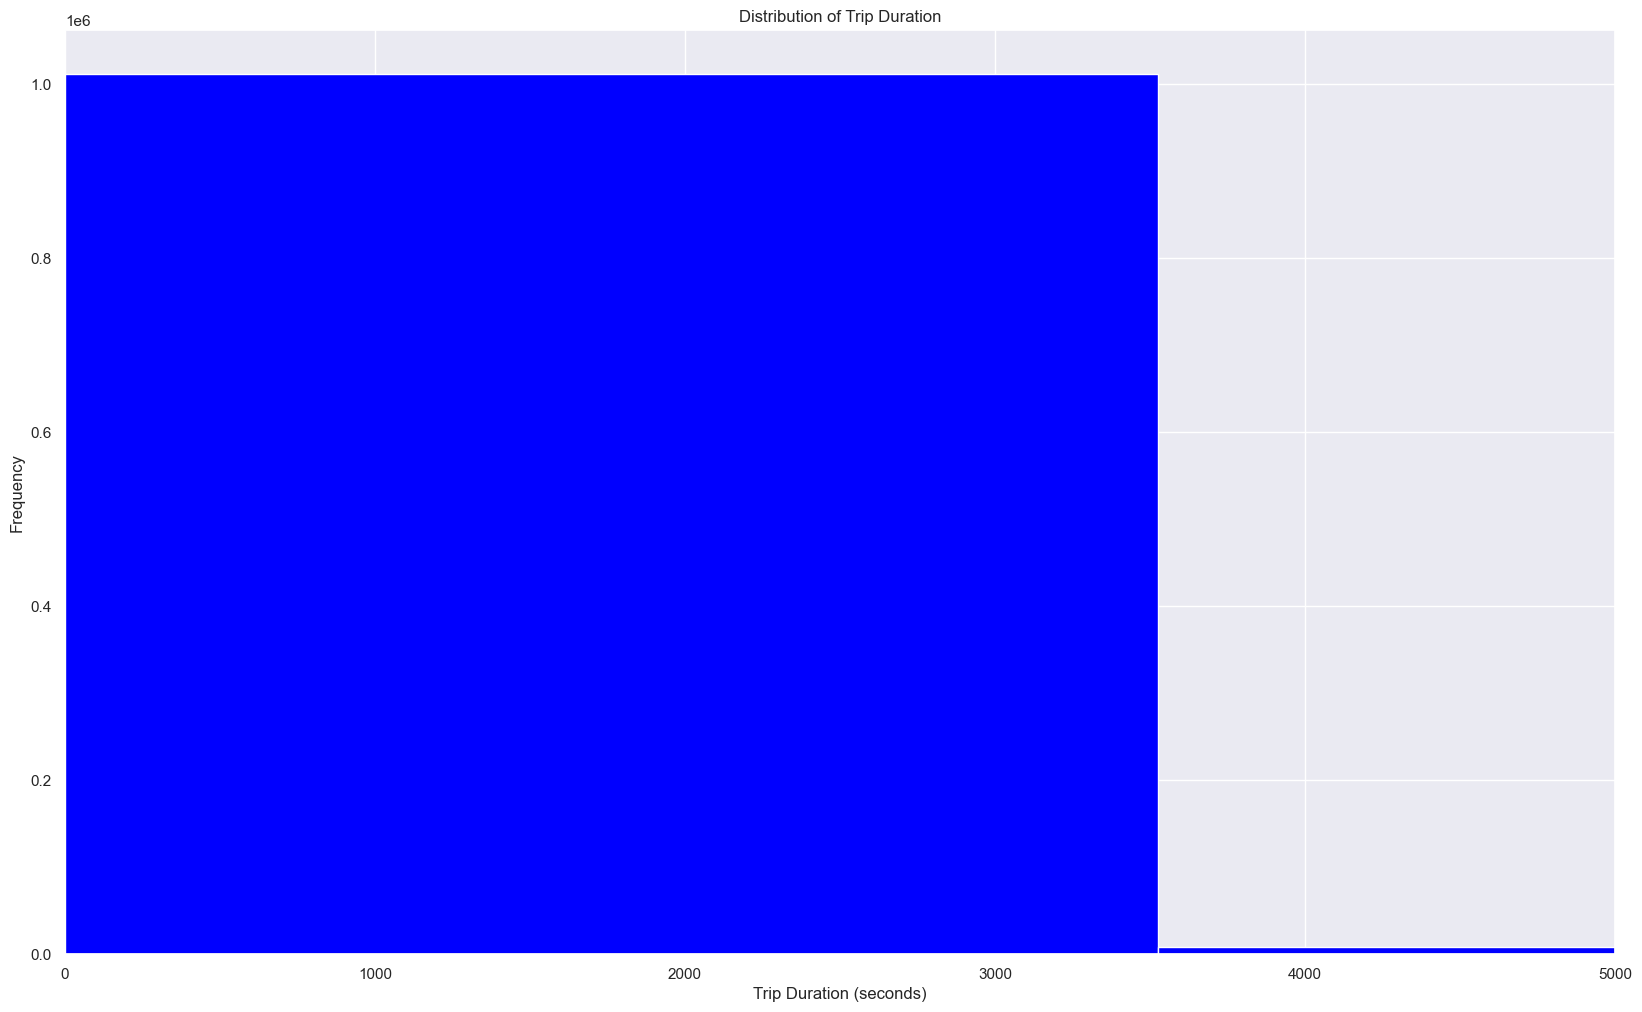

In [10]:
plt.figure(figsize=(20, 12))
plt.hist(train_data['trip_duration'], bins=1000, color='blue', alpha=1)

# Ограничим ось X, чтобы исключить выбросы и лучше увидеть основное распределение
plt.xlim(0, 5000)

plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.show()


**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

У логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашим выборкам колонки `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке:

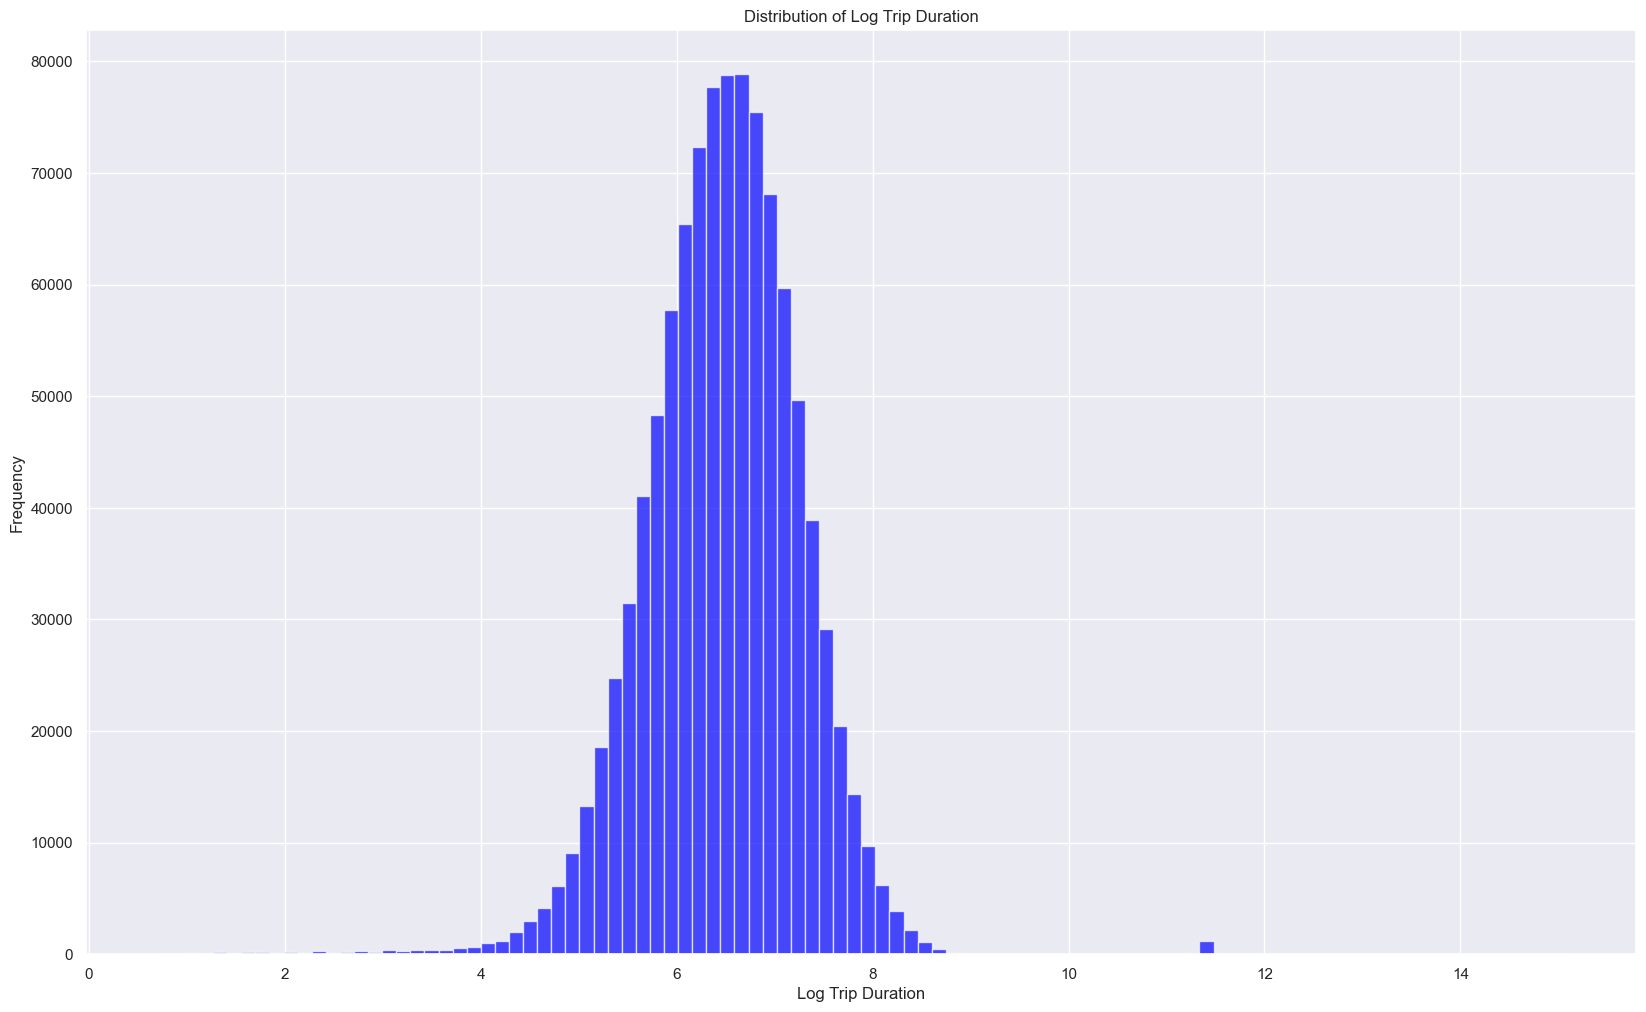

In [11]:
# Добавление колонки log_trip_duration
train_data['log_trip_duration'] = np.log1p(train_data['trip_duration'])

# Построение гистограммы
plt.figure(figsize=(20, 12))
plt.hist(train_data['log_trip_duration'], bins=100, color='blue', alpha=0.7)
plt.xlabel('Log Trip Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Log Trip Duration')
plt.show()

## Часть 1. Изучаем `pickup_datetime`

**Задание 2.**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

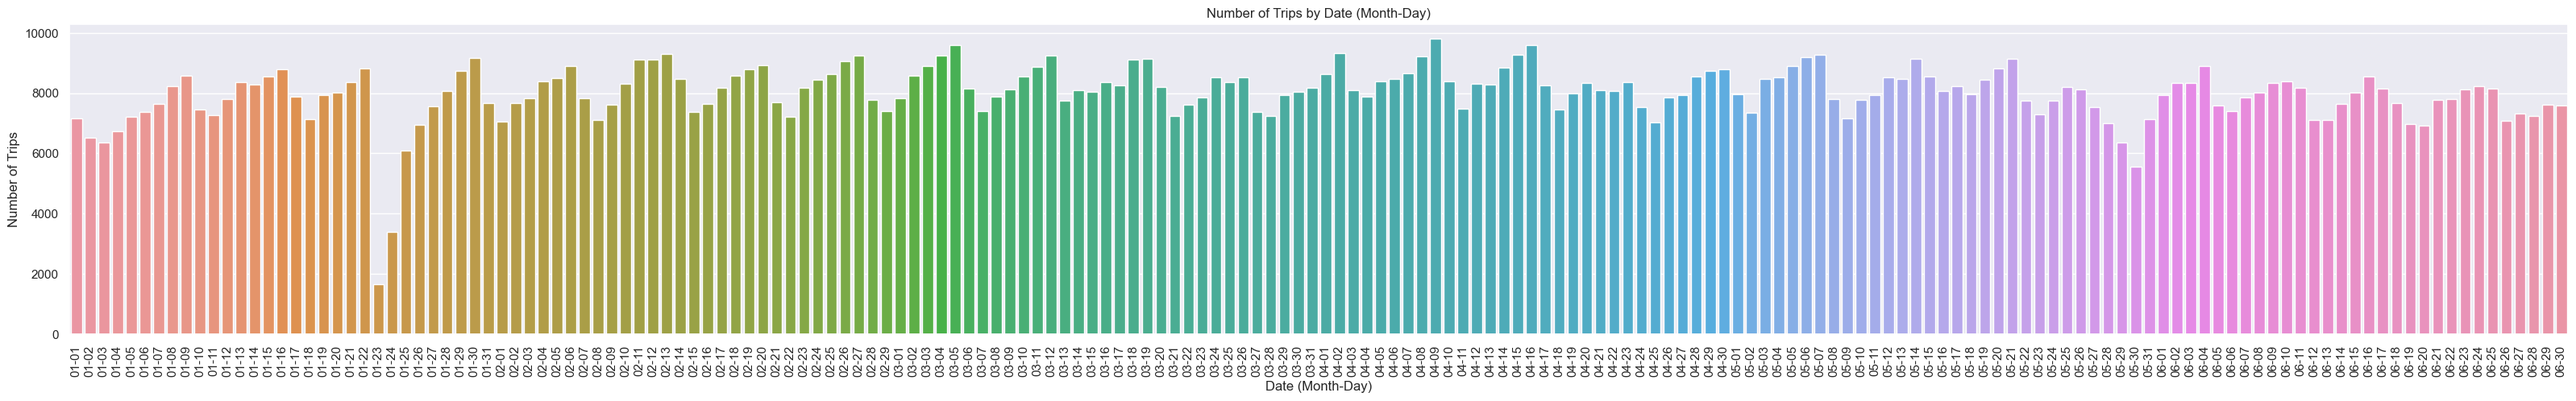

In [12]:
# Создание колонки с месяцем и днем
data['month_day'] = data['pickup_datetime'].dt.strftime('%m-%d')

# Группировка по month_day и подсчет количества поездок
trips_per_day = data.groupby('month_day').size().reset_index(name='number_of_trips')

# Построение графика
plt.figure(figsize=(40, 5))
sns.barplot(x='month_day', y='number_of_trips', data=trips_per_day)
plt.xlabel('Date (Month-Day)')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Date (Month-Day)')
plt.xticks(rotation=90)  # Поворачиваем метки для лучшей читаемости
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.
23.01.2016 В Нью-Йорке из-за снежной бури запретили автомобильное движение
30.05.2016 День поминовения в Нью-Йорке

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [13]:
# Подсчет количества поездок по дате
trips_per_day = train_data.groupby(train_data['pickup_datetime'].dt.date).size()

# Находим дни с минимальным количеством поездок
min_trips_days = trips_per_day[trips_per_day < trips_per_day.quantile(0.1)]  # Дни с количеством поездок ниже 10%
print(min_trips_days)


pickup_datetime
2016-01-02    4541
2016-01-03    4465
2016-01-04    4719
2016-01-18    4964
2016-01-23    1154
2016-01-24    2378
2016-01-25    4296
2016-01-26    4954
2016-02-01    4934
2016-04-25    4906
2016-05-09    5008
2016-05-28    4938
2016-05-29    4486
2016-05-30    3916
2016-05-31    4916
2016-06-13    4888
2016-06-19    4875
2016-06-20    4864
2016-06-26    4952
dtype: int64


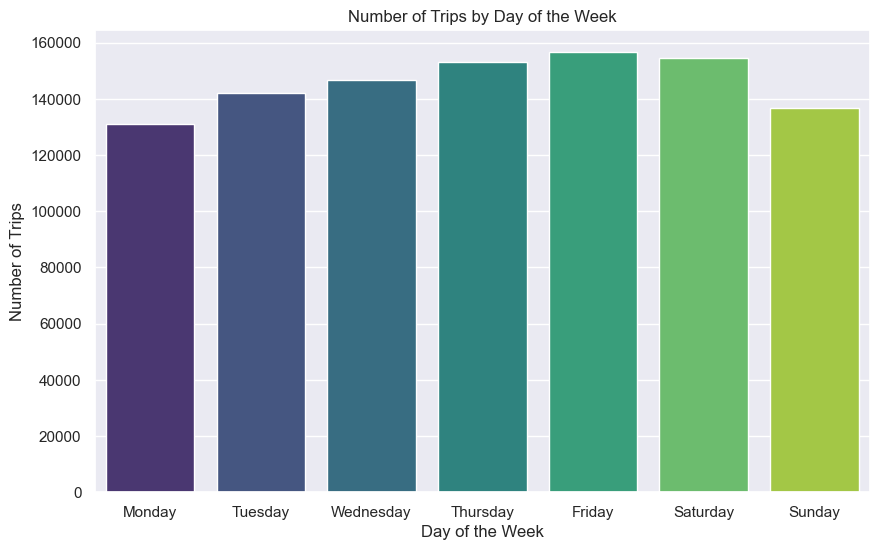

In [14]:
train_data['day_of_week'] = train_data['pickup_datetime'].dt.day_name()

# Группировка по дню недели и подсчет количества поездок
trips_per_weekday = train_data.groupby('day_of_week').size().reset_index(name='number_of_trips')

# Упорядочивание дней недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_per_weekday['day_of_week'] = pd.Categorical(trips_per_weekday['day_of_week'], categories=days_order, ordered=True)
trips_per_weekday = trips_per_weekday.sort_values('day_of_week')

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='number_of_trips', data=trips_per_weekday, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Day of the Week')
plt.show()

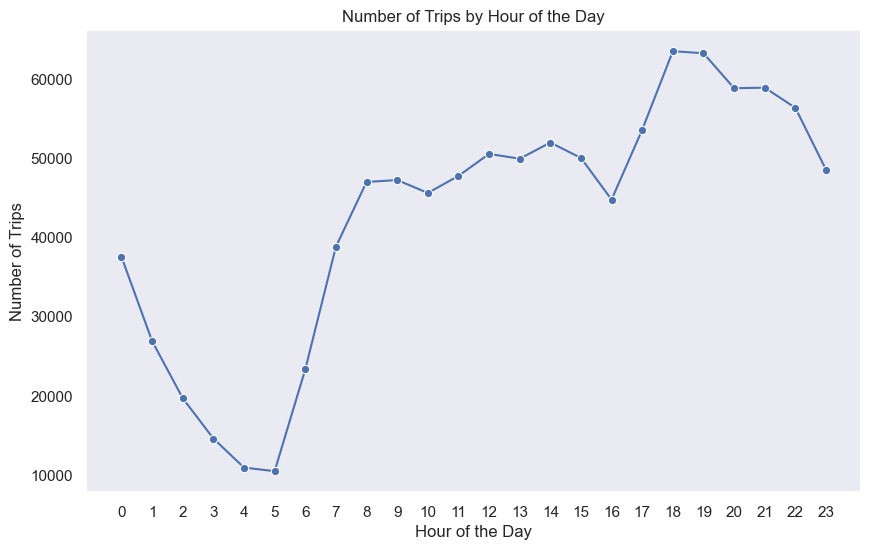

In [15]:
# Создание колонки с часами
train_data['hour_of_day'] = train_data['pickup_datetime'].dt.hour

# Группировка по часам и подсчет количества поездок
trips_per_hour = train_data.groupby('hour_of_day').size().reset_index(name='number_of_trips')

# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_of_day', y='number_of_trips', data=trips_per_hour, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour of the Day')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Задание 3.**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

<Figure size 1200x600 with 0 Axes>

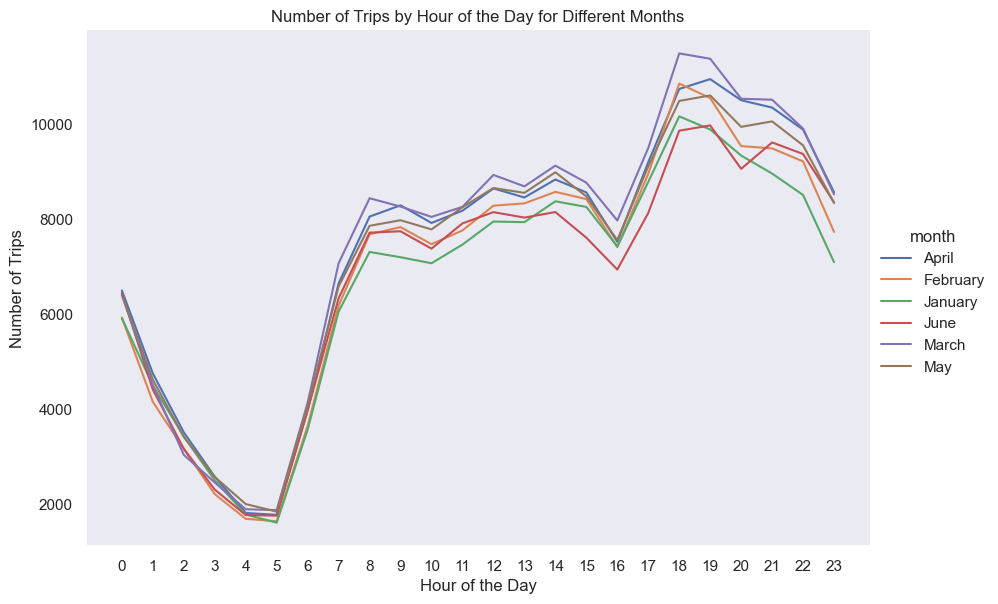

In [16]:
# Создание колонки с месяцами
train_data['month'] = train_data['pickup_datetime'].dt.month_name()

# Создание колонки с часами
train_data['hour_of_day'] = train_data['pickup_datetime'].dt.hour

# Группировка по месяцам и часам, подсчет количества поездок
trips_per_month_hour = train_data.groupby(['month', 'hour_of_day']).size().reset_index(name='number_of_trips')

# Построение графика зависимости количества поездок от часа для разных месяцев
plt.figure(figsize=(12, 6))
sns.relplot(x='hour_of_day', y='number_of_trips', hue='month', data=trips_per_month_hour, kind='line', height=6, aspect=1.5)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour of the Day for Different Months')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

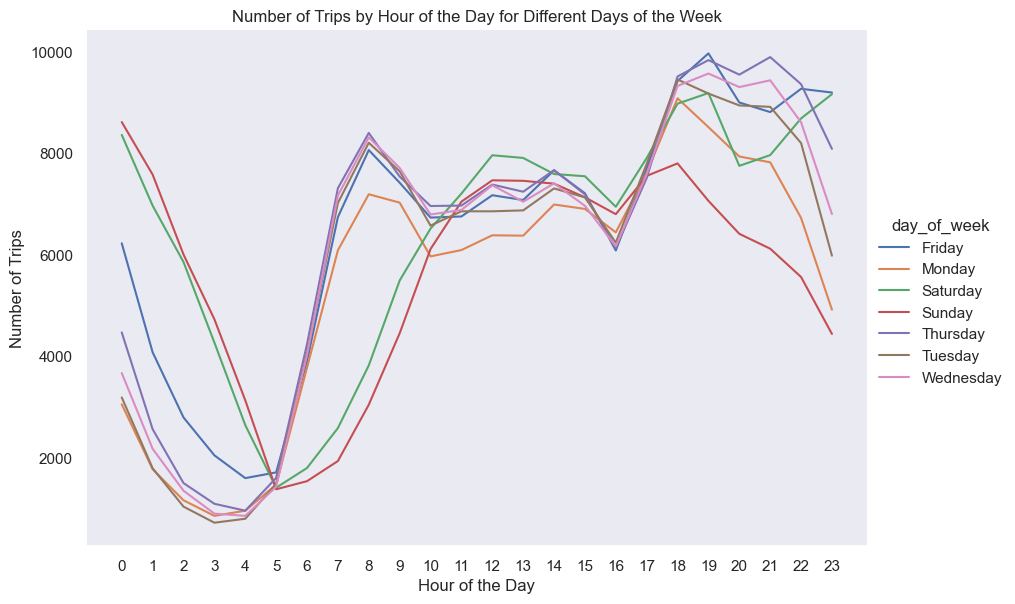

In [17]:
# Группировка по дням недели и часам, подсчет количества поездок
trips_per_weekday_hour = train_data.groupby(['day_of_week', 'hour_of_day']).size().reset_index(name='number_of_trips')

# Построение графика зависимости количества поездок от часа для разных дней недели
plt.figure(figsize=(12, 6))
sns.relplot(x='hour_of_day', y='number_of_trips', hue='day_of_week', data=trips_per_weekday_hour, kind='line', height=6, aspect=1.5)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour of the Day for Different Days of the Week')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4.**. По *обучающей выборке* нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

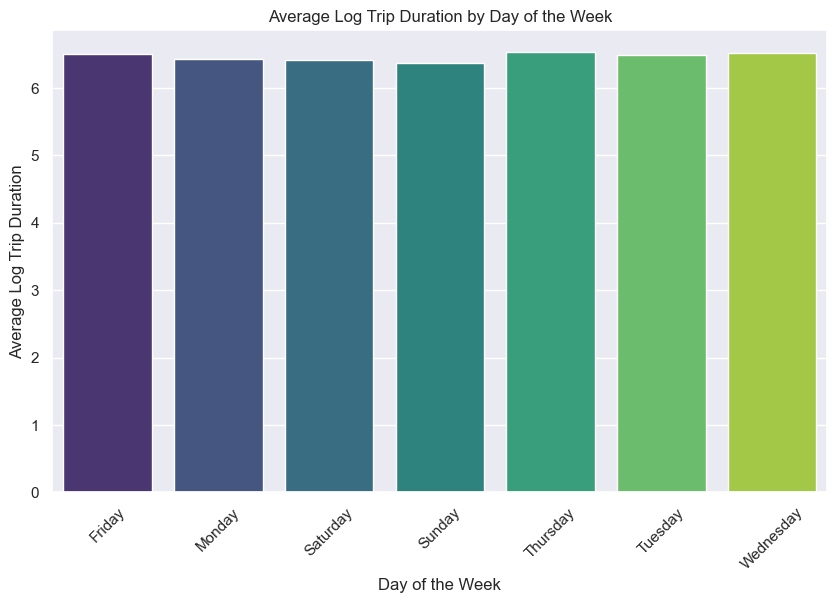

In [18]:
# Создание колонки log_trip_duration
train_data['log_trip_duration'] = np.log1p(train_data['trip_duration'])
test_data['log_trip_duration'] = np.log1p(test_data['trip_duration'])


# Группировка по дням недели и расчет среднего логарифма времени поездки
avg_log_trip_duration_weekday = train_data.groupby('day_of_week')['log_trip_duration'].mean().reset_index()

# Построение графика зависимости среднего логарифма времени поездки от дня недели
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='log_trip_duration', data=avg_log_trip_duration_weekday, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Average Log Trip Duration')
plt.title('Average Log Trip Duration by Day of the Week')
plt.xticks(rotation=45)
plt.show()


C:\Users\Egor\AppData\Local\Temp\ipykernel_11024\344716938.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='hour_of_day', y='log_trip_duration', data=avg_log_trip_duration_hour, marker='o', palette='viridis')


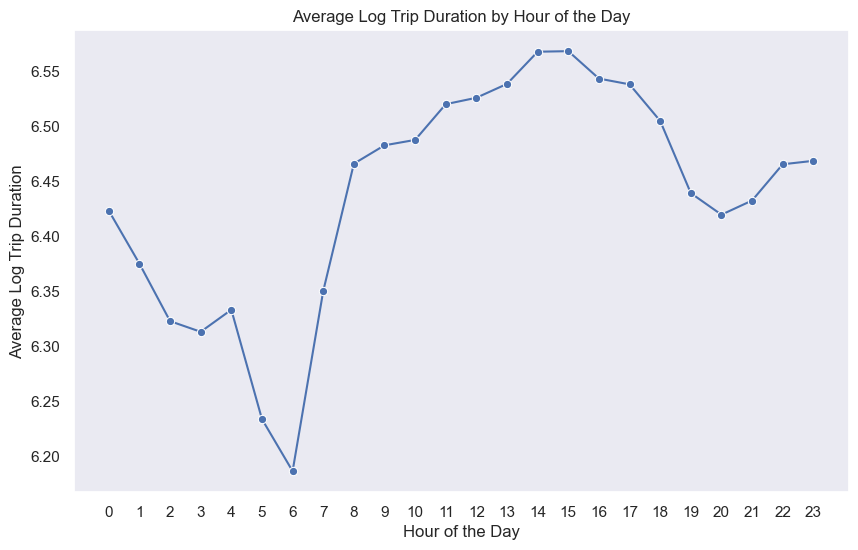

In [19]:
# Группировка по часам и расчет среднего логарифма времени поездки
avg_log_trip_duration_hour = train_data.groupby('hour_of_day')['log_trip_duration'].mean().reset_index()

# Построение графика зависимости среднего логарифма времени поездки от часа в сутках
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_of_day', y='log_trip_duration', data=avg_log_trip_duration_hour, marker='o', palette='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Log Trip Duration')
plt.title('Average Log Trip Duration by Hour of the Day')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


C:\Users\Egor\AppData\Local\Temp\ipykernel_11024\3587780622.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='day_of_year', y='log_trip_duration', data=avg_log_trip_duration_day_of_year, marker='o', palette='viridis')


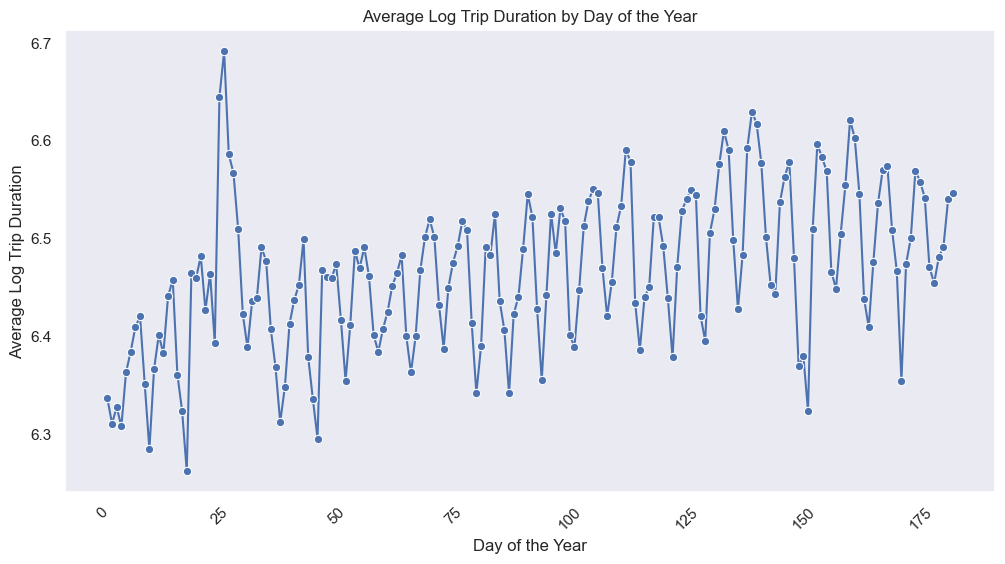

In [20]:
# Добавление log_trip_duration, если еще не было
if 'log_trip_duration' not in train_data.columns:
    train_data['log_trip_duration'] = np.log1p(train_data['trip_duration'])
    test_data['log_trip_duration'] = np.log1p(test_data['trip_duration'])

# Добавление day_of_year, если еще не было
if 'day_of_year' not in train_data.columns:
    train_data['day_of_year'] = train_data['pickup_datetime'].dt.dayofyear
    test_data['day_of_year'] = test_data['pickup_datetime'].dt.dayofyear


# Группировка по дням в году и расчет среднего логарифма времени поездки
avg_log_trip_duration_day_of_year = train_data.groupby('day_of_year')['log_trip_duration'].mean().reset_index()

# Построение графика зависимости среднего логарифма времени поездки от дня в году
plt.figure(figsize=(12, 6))
sns.lineplot(x='day_of_year', y='log_trip_duration', data=avg_log_trip_duration_day_of_year, marker='o', palette='viridis')
plt.xlabel('Day of the Year')
plt.ylabel('Average Log Trip Duration')
plt.title('Average Log Trip Duration by Day of the Year')
plt.xticks(rotation=45)
plt.grid()
plt.show()


**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [21]:
# Добавление новых признаков на основе pickup_datetime
train_data['day_of_week'] = train_data['pickup_datetime'].dt.dayofweek  # День недели (0=Пн, 6=Вс)
train_data['month'] = train_data['pickup_datetime'].dt.month  # Месяц (1-12)
train_data['hour'] = train_data['pickup_datetime'].dt.hour  # Час (0-23)
train_data['day_of_year'] = train_data['pickup_datetime'].dt.dayofyear  # Номер дня в году

# Добавление бинарных признаков для аномальных периодов
anomalous_dates = ['2016-01-23', '2016-05-30']#????
train_data['is_anomalous'] = train_data['pickup_datetime'].dt.date.isin(pd.to_datetime(anomalous_dates).date)
train_data['is_anomalous'] = train_data['is_anomalous'].astype(int)  # Преобразование в бинарный признак
test_data['is_anomalous'] = test_data['pickup_datetime'].dt.date.isin(pd.to_datetime(anomalous_dates).date)
test_data['is_anomalous'] = test_data['is_anomalous'].astype(int)  # Преобразование в бинарный признак

# Выводим первые 5 строк для проверки
print(train_data[['pickup_datetime', 'day_of_week', 'month', 'hour', 'is_anomalous', 'day_of_year']].head())
print(train_data)

            pickup_datetime  day_of_week  month  hour  is_anomalous  \
1011257 2016-05-03 09:03:08            1      5     9             0   
178550  2016-01-01 16:40:51            4      1    16             0   
551460  2016-04-24 13:57:03            6      4    13             0   
1434271 2016-01-10 17:03:47            6      1    17             0   
1173610 2016-02-25 17:37:36            3      2    17             0   

         day_of_year  
1011257          124  
178550             1  
551460           115  
1434271           10  
1173610           56  
                id  vendor_id     pickup_datetime  passenger_count  \
1011257  id2209155          2 2016-05-03 09:03:08                2   
178550   id0586605          1 2016-01-01 16:40:51                1   
551460   id0467144          1 2016-04-24 13:57:03                1   
1434271  id0989010          2 2016-01-10 17:03:47                1   
1173610  id0580742          1 2016-02-25 17:37:36                1   
...            

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Задание 5.**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [22]:
# Добавление признаков
train_data['day_of_week'] = train_data['pickup_datetime'].dt.dayofweek  # День недели (0 - понедельник, 6 - воскресенье)
train_data['month'] = train_data['pickup_datetime'].dt.month  # Месяц
train_data['hour'] = train_data['pickup_datetime'].dt.hour  # Час
train_data['day_of_year'] = train_data['pickup_datetime'].dt.dayofyear  # Номер дня в году

test_data['day_of_week'] = test_data['pickup_datetime'].dt.dayofweek  # День недели (0 - понедельник, 6 - воскресенье)
test_data['month'] = test_data['pickup_datetime'].dt.month  # Месяц
test_data['hour'] = test_data['pickup_datetime'].dt.hour  # Час
test_data['day_of_year'] = test_data['pickup_datetime'].dt.dayofyear  # Номер дня в году

In [23]:

# Добавление бинарных признаков для аномальных периодов


# Теперь можно обучать модель
categorical_features = ['day_of_week', 'month', 'hour', 'is_anomalous']
numerical_features = ['day_of_year']

# Разделение целевого признака и остальных данных
X_train = train_data[categorical_features + numerical_features]
y_train = train_data['log_trip_duration']  # В качестве целевой переменной используем логарифм времени поездки

X_test = test_data[categorical_features + numerical_features]
y_test = test_data['log_trip_duration']  # В качестве целевой переменной используем логарифм времени поездки

# Создание трансформера для обработки категориальных и числовых признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Масштабируем числовые признаки
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Кодируем категориальные признаки
    ])

# Создание pipeline: предобработка данных -> Ridge-регрессия
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'RMSE: {rmse}')


RMSE: 0.7882255823363992


## Часть 2. Изучаем координаты
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Подготовлена функция, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [24]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [25]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [26]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(center=[40.75068701934814, -73.97258852386474], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [27]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Map(center=[40.75416878128052, -73.9724647064209], controls=(ZoomControl(options=['position', 'zoom_in_text', …

**Вопрос**: Какие две точки выделяются на карте?
Ответ: аэропорты

**Задание 6.**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [28]:
# Функция для расчета расстояния Haversine
def haversine(lat1, lon1, lat2, lon2):
    """
    Расчет кратчайшего расстояния между двумя точками на поверхности Земли.
    Входные значения: широта и долгота в радианах.
    Выход: расстояние в километрах.
    """
    # Радиус Земли в километрах
    R = 6371
    
    # Преобразование градусов в радианы
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)
    
    # Разница координат
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    # Формула Haversine
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Возвращаем расстояние
    return R * c

# Применяем функцию к данным, чтобы посчитать расстояние между точками начала и конца поездки
train_data['haversine'] = train_data.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], 
                                                                row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
test_data['haversine'] = test_data.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], 
                                                                row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
# Проверим результат
train_data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'haversine']].head()
print(train_data)

                id  vendor_id     pickup_datetime  passenger_count  \
1011257  id2209155          2 2016-05-03 09:03:08                2   
178550   id0586605          1 2016-01-01 16:40:51                1   
551460   id0467144          1 2016-04-24 13:57:03                1   
1434271  id0989010          2 2016-01-10 17:03:47                1   
1173610  id0580742          1 2016-02-25 17:37:36                1   
...            ...        ...                 ...              ...   
259178   id1753868          2 2016-03-25 07:11:49                2   
1414414  id2204747          1 2016-02-16 18:01:45                1   
131932   id3043606          2 2016-01-26 19:22:29                1   
671155   id1458584          1 2016-01-19 11:53:47                1   
121958   id0357025          2 2016-02-10 22:39:31                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1011257        -73.979813        40.752529         -73.982681   
178550         -73.977623    

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [29]:
# Создание новой колонки с логарифмом расстояния (haversine)
train_data['log_haversine'] = np.log1p(train_data['haversine'])
test_data['log_haversine'] = np.log1p(test_data['haversine'])

# Проверим результат
train_data[['haversine', 'log_haversine']].head()

,haversine,log_haversine
1011257,1.263187,0.816774
178550,4.804012,1.758549
551460,7.471088,2.136659
1434271,3.444869,1.491750
1173610,2.481063,1.247338


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [30]:
# Вычисление корреляции между исходным расстоянием и целевой переменной
corr_haversine = train_data['haversine'].corr(train_data['log_trip_duration'])
print(f"Корреляция между расстоянием (haversine) и логарифмом времени поездки: {corr_haversine:.4f}")

# Вычисление корреляции между логарифмом расстояния и целевой переменной
corr_log_haversine = train_data['log_haversine'].corr(train_data['log_trip_duration'])
print(f"Корреляция между логарифмом расстояния и логарифмом времени поездки: {corr_log_haversine:.4f}")


Корреляция между расстоянием (haversine) и логарифмом времени поездки: 0.5654
Корреляция между логарифмом расстояния и логарифмом времени поездки: 0.7500


**Задание 7.** Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

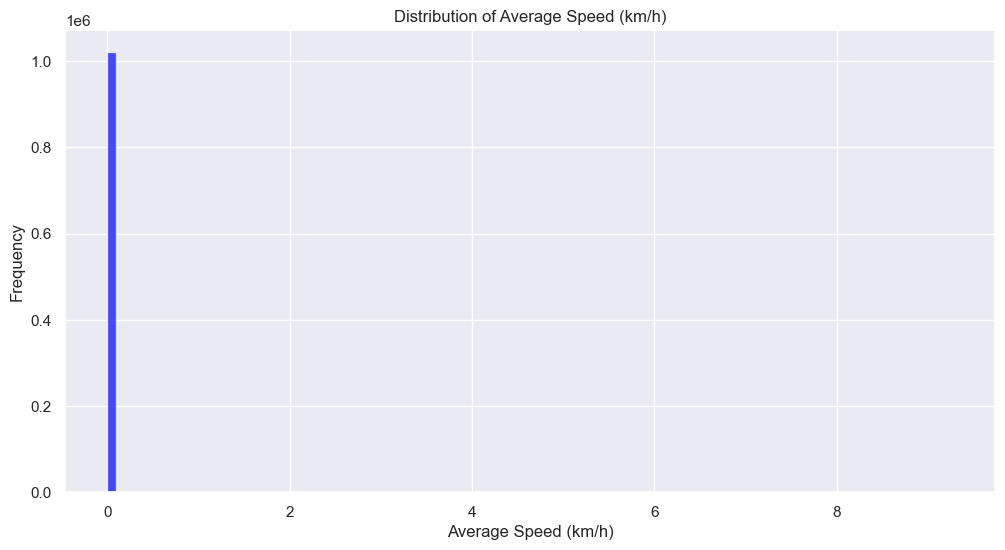

In [31]:
# Вычисление средней скорости: расстояние (haversine) делим на продолжительность поездки (в секундах)
train_data['avg_speed'] = train_data['haversine'] / train_data['trip_duration']
test_data['avg_speed'] = test_data['haversine'] / test_data['trip_duration']

# Переводим скорость из м/с в км/ч
train_data['avg_speed_kmh'] = train_data['avg_speed'] * 3600 / 1000
test_data['avg_speed_kmh'] = test_data['avg_speed'] * 3600 / 1000


# Построение гистограммы распределения средней скорости
plt.figure(figsize=(12, 6))
plt.hist(train_data['avg_speed_kmh'], bins=100, color='blue', alpha=0.7)
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Speed (km/h)')
plt.grid(True)
plt.show()


Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

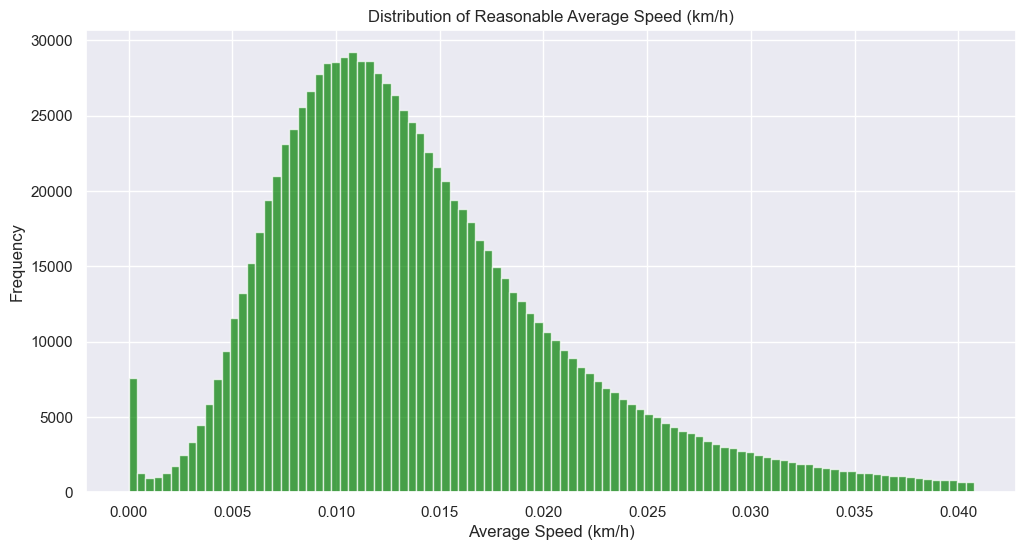

In [32]:
# Вычисление 99-го процентиля для отсеивания аномальных скоростей
speed_threshold = train_data['avg_speed_kmh'].quantile(0.99)

# Фильтрация данных, исключая значения скорости выше 99-го процентиля
reasonable_speed_data = train_data[train_data['avg_speed_kmh'] <= speed_threshold]

# Построение гистограммы для разумных значений скорости
plt.figure(figsize=(12, 6))
plt.hist(reasonable_speed_data['avg_speed_kmh'], bins=100, color='green', alpha=0.7)
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Reasonable Average Speed (km/h)')
plt.grid(True)
plt.show()


Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

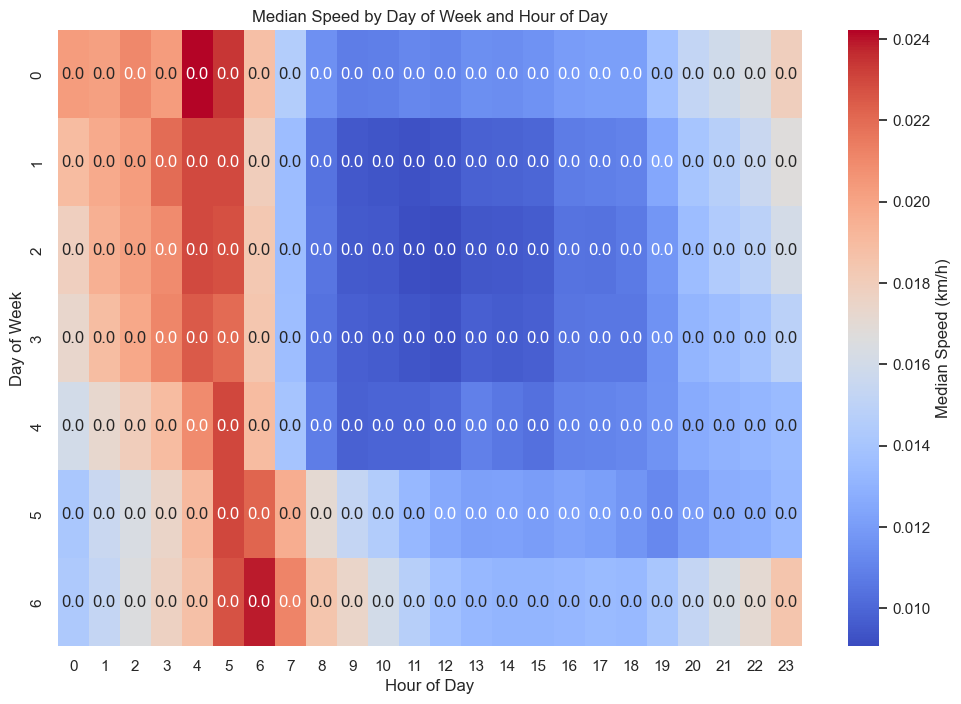

In [33]:
# Создание признаков дня недели и часа суток
train_data['pickup_day_of_week'] = train_data['pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
train_data['pickup_hour'] = train_data['pickup_datetime'].dt.hour  # 0-23
test_data['pickup_day_of_week'] = test_data['pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
test_data['pickup_hour'] = test_data['pickup_datetime'].dt.hour  # 0-23

# Группировка данных по дням недели и часам суток, вычисление медианы скоростей
median_speed = train_data.groupby(['pickup_day_of_week', 'pickup_hour'])['avg_speed_kmh'].median().unstack()

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(median_speed, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Median Speed (km/h)'})
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Median Speed by Day of Week and Hour of Day')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?
Ответ: Значение скорости нельзя использовать во время обучения, потому что оно вычисляется с использованием времени поездки (целевой переменной). Включение производных признаков, основанных на целевой переменной, называется утечкой данных. Это может привести к тому, что модель будет "видеть" целевую переменную и предсказывать её с высокой точностью, но в реальных условиях она не сможет воспроизвести такие результаты.

In [34]:
train_data = train_data.drop(columns=['avg_speed_kmh'])
tesr_data = test_data.drop(columns=['avg_speed_kmh'])


**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [35]:
def is_rush_hour(row):
    hour = row['hour']
    return (hour >= 8 and hour < 15)

def is_free_road(row):
    hour = row['hour']
    return (hour >= 1 and hour < 7)

# Добавление признаков
train_data['in_rush_hour'] = train_data.apply(is_rush_hour, axis=1)
train_data['in_free_road'] = train_data.apply(is_free_road, axis=1)

test_data['in_rush_hour'] = test_data.apply(is_rush_hour, axis=1)
test_data['in_free_road'] = test_data.apply(is_free_road, axis=1)

**Задание 8.** Как уже было замечено выше, на карте выделяются две точки - аэропорты La Guardia и John F Kennedy. Для каждого из аэропортов добавьте в выборки два признака: началась ли поездка из этого аэропорта и закончилась ли поездка в этом аэропорте.

In [36]:
# Определение координат аэропортов
lga_coordinates = (40.7769, -73.8739)
jfk_coordinates = (40.6413, -73.7781)

# Функции для проверки, началась ли поездка из аэропорта или закончилась в нем
def is_pickup_from_lga(row):
    return (row['pickup_latitude'], row['pickup_longitude']) == lga_coordinates

def is_dropoff_to_lga(row):
    return (row['dropoff_latitude'], row['dropoff_longitude']) == lga_coordinates

def is_pickup_from_jfk(row):
    return (row['pickup_latitude'], row['pickup_longitude']) == jfk_coordinates

def is_dropoff_to_jfk(row):
    return (row['dropoff_latitude'], row['dropoff_longitude']) == jfk_coordinates

# Добавление признаков в датафрейм
train_data['is_pickup_from_LGA'] = train_data.apply(is_pickup_from_lga, axis=1)
train_data['is_dropoff_to_LGA'] = train_data.apply(is_dropoff_to_lga, axis=1)
train_data['is_pickup_from_JFK'] = train_data.apply(is_pickup_from_jfk, axis=1)
train_data['is_dropoff_to_JFK'] = train_data.apply(is_dropoff_to_jfk, axis=1)

test_data['is_pickup_from_LGA'] = test_data.apply(is_pickup_from_lga, axis=1)
test_data['is_dropoff_to_LGA'] = test_data.apply(is_dropoff_to_lga, axis=1)
test_data['is_pickup_from_JFK'] = test_data.apply(is_pickup_from_jfk, axis=1)
test_data['is_dropoff_to_JFK'] = test_data.apply(is_dropoff_to_jfk, axis=1)

print(train_data['is_pickup_from_LGA'])


1011257    False
178550     False
551460     False
1434271    False
1173610    False
           ...  
259178     False
1414414    False
131932     False
671155     False
121958     False
Name: is_pickup_from_LGA, Length: 1021050, dtype: bool


Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

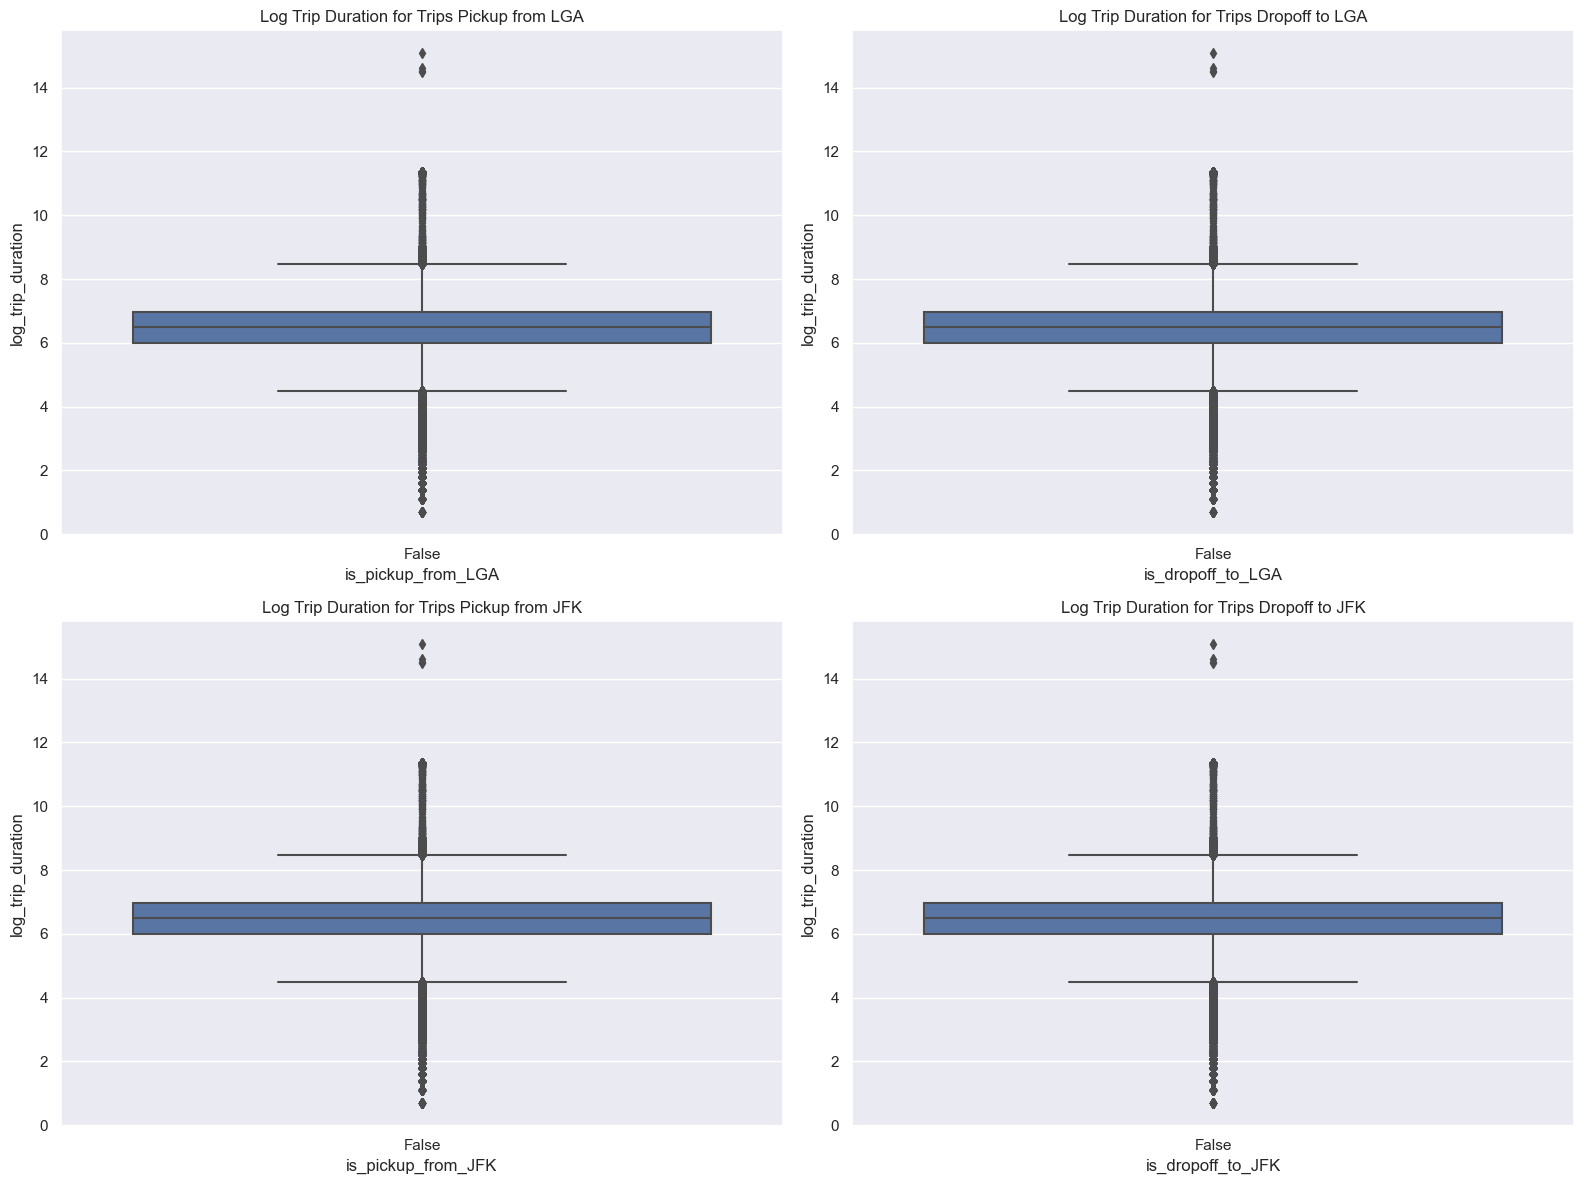

In [37]:


# Настройка размера графиков
plt.figure(figsize=(16, 12))

# 1. Ящик с усами для поездок, начавшихся из LGA
plt.subplot(2, 2, 1)
sns.boxplot(x='is_pickup_from_LGA', y='log_trip_duration', data=train_data)
plt.title('Log Trip Duration for Trips Pickup from LGA')

# 2. Ящик с усами для поездок, закончившихся в LGA
plt.subplot(2, 2, 2)
sns.boxplot(x='is_dropoff_to_LGA', y='log_trip_duration', data=train_data)
plt.title('Log Trip Duration for Trips Dropoff to LGA')

# 3. Ящик с усами для поездок, начавшихся из JFK
plt.subplot(2, 2, 3)
sns.boxplot(x='is_pickup_from_JFK', y='log_trip_duration', data=train_data)
plt.title('Log Trip Duration for Trips Pickup from JFK')

# 4. Ящик с усами для поездок, закончившихся в JFK
plt.subplot(2, 2, 4)
sns.boxplot(x='is_dropoff_to_JFK', y='log_trip_duration', data=train_data)
plt.title('Log Trip Duration for Trips Dropoff to JFK')

# Отображение графиков
plt.tight_layout()
plt.show()


**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9.** Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=10, n_cols=10):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lat_min = None
        self.lat_max = None
        self.lon_min = None
        self.lon_max = None
        self.lat_bins = None
        self.lon_bins = None

    def fit(self, X, y=None):
        # Определяем минимальные и максимальные значения широты и долготы
        self.lat_min = X['pickup_latitude'].min()
        self.lat_max = X['pickup_latitude'].max()
        self.lon_min = X['pickup_longitude'].min()
        self.lon_max = X['pickup_longitude'].max()

        # Создаем равномерные ячейки (бинирование)
        self.lat_bins = np.linspace(self.lat_min, self.lat_max, self.n_rows + 1)
        self.lon_bins = np.linspace(self.lon_min, self.lon_max, self.n_cols + 1)

        return self

    def transform(self, X):
        # Определяем ячейки для начала и окончания поездки
        pickup_cell = pd.cut(X['pickup_latitude'], bins=self.lat_bins, labels=False, include_lowest=True) * self.n_cols + \
                      pd.cut(X['pickup_longitude'], bins=self.lon_bins, labels=False, include_lowest=True)

        dropoff_cell = pd.cut(X['dropoff_latitude'], bins=self.lat_bins, labels=False, include_lowest=True) * self.n_cols + \
                       pd.cut(X['dropoff_longitude'], bins=self.lon_bins, labels=False, include_lowest=True)

        # Устанавливаем -1 для ячеек, которые не попадают в границы
        pickup_cell = pickup_cell.where((pickup_cell >= 0) & (pickup_cell < self.n_rows * self.n_cols), -1)
        dropoff_cell = dropoff_cell.where((dropoff_cell >= 0) & (dropoff_cell < self.n_rows * self.n_cols), -1)

        # Создаем новый DataFrame с ячейками
        return pd.DataFrame({
            'pickup_cell': pickup_cell,
            'dropoff_cell': dropoff_cell
        })

# Применение трансформера к данным
transformer = MapGridTransformer(n_rows=10, n_cols=10)
transformer.fit(train_data)  # train_data
cell_data = transformer.transform(train_data)

# Объединение с исходными данными
train_data = pd.concat([train_data, cell_data], axis=1)

transformer = MapGridTransformer(n_rows=10, n_cols=10)
transformer.fit(test_data)  # test_data
cell_data = transformer.transform(test_data)

# Объединение с исходными данными
test_data = pd.concat([test_data, cell_data], axis=1)

**Задание 10.** Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, численные признаки отмасштабируйте.

In [39]:
train_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,day_of_week,hour_of_day,...,day_of_year,hour,is_anomalous,haversine,log_haversine,avg_speed,pickup_day_of_week,pickup_hour,pickup_cell,dropoff_cell
count,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,...,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06,1.021050e+06
mean,1.535298e+00,1.663364e+00,-7.397347e+01,4.075093e+01,-7.397339e+01,4.075180e+01,9.617193e+02,6.467067e+00,3.050223e+00,1.360399e+01,...,9.182435e+01,1.360399e+01,4.965477e-03,3.443973e+00,1.255125e+00,4.009692e-03,3.050223e+00,1.360399e+01,3.699999e+01,3.700005e+01
std,4.987527e-01,1.312695e+00,6.453953e-02,3.347413e-02,6.416123e-02,3.581601e-02,5.900133e+03,7.960733e-01,1.954022e+00,6.402083e+00,...,5.157072e+01,6.402083e+00,7.029101e-02,4.361104e+00,6.273159e-01,4.330702e-03,1.954022e+00,6.402083e+00,9.862683e-02,8.364642e-02
min,1.000000e+00,0.000000e+00,-1.219332e+02,3.435970e+01,-1.219332e+02,3.218114e+01,1.000000e+00,6.931472e-01,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,-1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073734e+01,-7.399132e+01,4.073587e+01,3.970000e+02,5.986452e+00,1.000000e+00,9.000000e+00,...,4.800000e+01,9.000000e+00,0.000000e+00,1.231736e+00,8.027797e-01,2.535759e-03,1.000000e+00,9.000000e+00,3.700000e+01,3.700000e+01
50%,2.000000e+00,1.000000e+00,-7.398175e+01,4.075410e+01,-7.397975e+01,4.075453e+01,6.630000e+02,6.498282e+00,3.000000e+00,1.400000e+01,...,9.200000e+01,1.400000e+01,0.000000e+00,2.095418e+00,1.129923e+00,3.555517e-03,3.000000e+00,1.400000e+01,3.700000e+01,3.700000e+01
75%,2.000000e+00,2.000000e+00,-7.396734e+01,4.076834e+01,-7.396303e+01,4.076981e+01,1.075000e+03,6.981006e+00,5.000000e+00,1.900000e+01,...,1.360000e+02,1.900000e+01,0.000000e+00,3.879408e+00,1.585024e+00,4.958874e-03,5.000000e+00,1.900000e+01,3.700000e+01,3.700000e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.507575e+01,6.000000e+00,2.300000e+01,...,1.820000e+02,2.300000e+01,1.000000e+00,1.240909e+03,7.124405e+00,2.576344e+00,6.000000e+00,2.300000e+01,9.800000e+01,5.800000e+01


In [40]:
test_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,day_of_year,is_anomalous,...,month,hour,haversine,log_haversine,avg_speed,avg_speed_kmh,pickup_day_of_week,pickup_hour,pickup_cell,dropoff_cell
count,437594.000000,437594.000000,437594.000000,437594.000000,437594.000000,437594.000000,437594.000000,437594.000000,437594.000000,437594.000000,...,437594.000000,437594.000000,437594.000000,437594.000000,437594.000000,437594.000000,437594.000000,437594.000000,437594.000000,437594.000000
mean,1.534139,1.667249,-73.973530,40.750910,-73.973471,40.751789,954.295872,6.466773,91.863419,0.004909,...,3.518471,13.612300,3.433608,1.253326,0.003999,0.014396,3.050730,13.612300,68.414494,68.693819
std,0.498834,1.317843,0.083891,0.031454,0.083841,0.036064,3195.103486,0.795028,51.555308,0.069890,...,1.680739,6.394118,4.141968,0.626771,0.003733,0.013439,1.954082,6.394118,2.001482,2.549530
min,1.000000,0.000000,-121.933342,35.310307,-121.933304,35.173546,1.000000,0.693147,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,-1.000000
25%,1.000000,1.000000,-73.991844,40.737381,-73.991348,40.735931,397.000000,5.986452,48.000000,0.000000,...,2.000000,9.000000,1.232128,0.802956,0.002529,0.009105,1.000000,9.000000,68.000000,68.000000
50%,2.000000,1.000000,-73.981728,40.754086,-73.979767,40.754520,662.000000,6.496775,92.000000,0.000000,...,4.000000,14.000000,2.089691,1.128071,0.003548,0.012774,3.000000,14.000000,68.000000,68.000000
75%,2.000000,2.000000,-73.967316,40.768394,-73.962982,40.769817,1075.000000,6.981006,136.000000,0.000000,...,5.000000,19.000000,3.865761,1.582223,0.004952,0.017828,5.000000,19.000000,68.000000,68.000000
max,2.000000,7.000000,-65.897385,43.139652,-65.897385,43.139652,86391.000000,11.366650,182.000000,1.000000,...,6.000000,23.000000,578.842818,6.362757,1.910372,6.877340,6.000000,23.000000,98.000000,98.000000


In [41]:
from sklearn.impute import SimpleImputer
# Проверка на пропущенные значения
if train_data.isnull().sum().sum() > 0:
    print("В данных есть пропущенные значения.")
else:
    print("Пропущенные значения отсутствуют.")

# Выделяем категориальные и численные признаки
categorical_features = ['day_of_week', 'month', 'hour', 'pickup_cell', 'dropoff_cell']  # Добавьте другие категориальные признаки
numerical_features = ['haversine', 'day_of_year']  # Добавьте другие численные признаки

# Разделяем целевой признак и остальные данные
X_train = train_data[categorical_features + numerical_features]
y_train = train_data['log_trip_duration']

X_test = test_data[categorical_features + numerical_features]
y_test = test_data['log_trip_duration']

# Создаем преобразователь для категориальных и численных признаков с обработкой пропусков
preprocessor = ColumnTransformer(
    transformers=[
        # Обрабатываем категориальные признаки
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполняем пропуски самым частым значением
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot кодирование
        ]), categorical_features),
        
        # Обрабатываем числовые признаки
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Заполняем пропуски средним значением
            ('scaler', StandardScaler())  # Масштабируем числовые признаки
        ]), numerical_features)
    ]
)

# Создаем pipeline для преобразования данных и обучения модели
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())  # Ridge-регрессия
])

# Обучаем модель
model.fit(X_train, y_train)

# Оценка модели на тестовой выборке
try:
    test_score = model.score(X_test, y_test)
    print(f"R^2 score на тестовой выборке: {test_score:.4f}")
except ValueError as e:
    print(f"Ошибка при оценке модели: {e}")

Пропущенные значения отсутствуют.
R^2 score на тестовой выборке: -678.9359


## Часть 3. Изучаем оставшиеся признаки

**Задание 11.** У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.
vendor_id:
Этот признак может быть полезным, так как разные компании такси могут работать по разному, что может влиять на время поездки.
passenger_count:
Количество пассажиров может влиять на время поездки. Например, с большим количеством пассажиров поездка может занять больше времени из-за необходимости дополнительной остановки или из-за большего веса транспортного средства.
store_and_fwd_flag:
Этот признак указывает на то, было ли передано данное такси в систему в реальном времени. Если флаг установлен, это может означать, что данные были переданы с задержкой, и такие поездки могут иметь особенности (например, связаны с определенными частями города, где связь хуже). (из информации о датасете)

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [42]:
# Подсчет уникальных значений для каждого признака
unique_vendor_id = train_data['vendor_id'].nunique()
unique_passenger_count = train_data['passenger_count'].nunique()
unique_store_and_fwd_flag = train_data['store_and_fwd_flag'].nunique()

print(f"Уникальных значений в vendor_id: {unique_vendor_id}")
print(f"Уникальных значений в passenger_count: {unique_passenger_count}")
print(f"Уникальных значений в store_and_fwd_flag: {unique_store_and_fwd_flag}")


Уникальных значений в vendor_id: 2
Уникальных значений в passenger_count: 10
Уникальных значений в store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

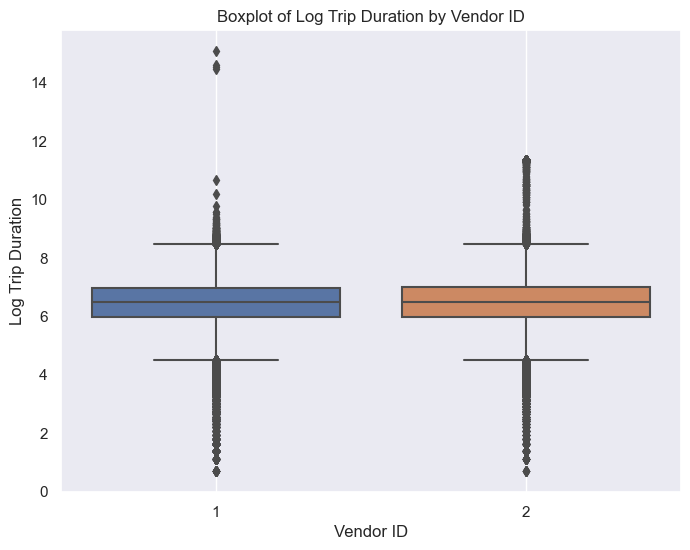

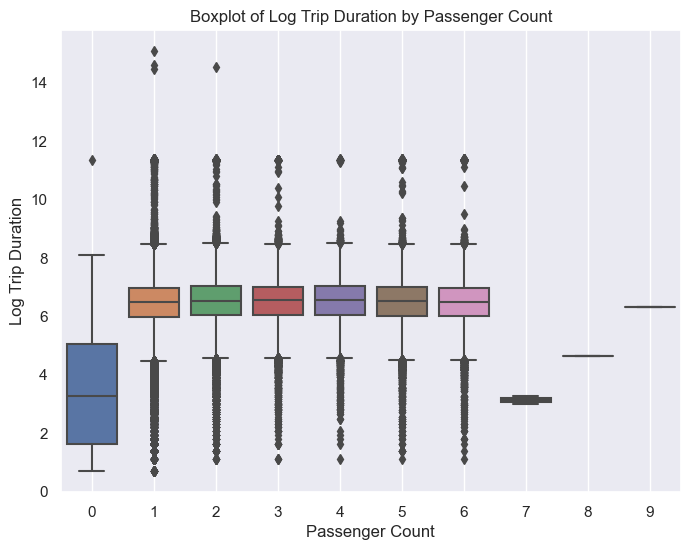

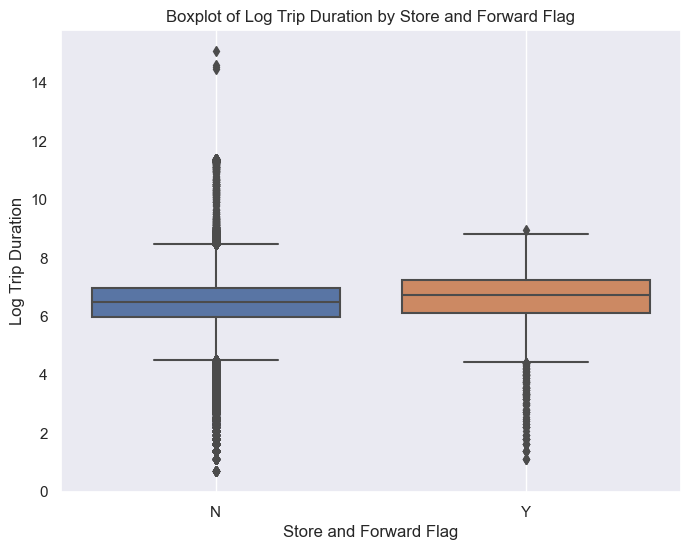

In [43]:
# Ящик с усами для vendor_id
plt.figure(figsize=(8, 6))
sns.boxplot(x='vendor_id', y='log_trip_duration', data=train_data)
plt.title('Boxplot of Log Trip Duration by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Log Trip Duration')
plt.grid()
plt.show()

# Ящик с усами для passenger_count
plt.figure(figsize=(8, 6))
sns.boxplot(x='passenger_count', y='log_trip_duration', data=train_data)
plt.title('Boxplot of Log Trip Duration by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Log Trip Duration')
plt.grid()
plt.show()

# Ящик с усами для store_and_fwd_flag
plt.figure(figsize=(8, 6))
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=train_data)
plt.title('Boxplot of Log Trip Duration by Store and Forward Flag')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Log Trip Duration')
plt.grid()
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [44]:
# Преобразование признака vendor_id
train_data['vendor_id'] = train_data['vendor_id'].map({1: 0, 2: 1})
test_data['vendor_id'] = test_data['vendor_id'].map({1: 0, 2: 1})

# Преобразование признака store_and_fwd_flag
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

# Проверим результат
print(train_data[['vendor_id', 'store_and_fwd_flag']].head())


         vendor_id  store_and_fwd_flag
1011257          1                   0
178550           0                   0
551460           0                   0
1434271          1                   0
1173610          0                   0


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?
Если графики "ящиков с усами" показывают четкие различия в логарифме времени поездки для разных значений признаков, эти признаки можно считать потенциально сильными.
Если различия незначительны или отсутствуют, то признаки вряд ли дадут сильный эффект и могут быть слабо информативными для модели.
В нашем случае:

**Задание 12.** Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [45]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель

**Задание 13.** В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

In [46]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [47]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14.** После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [48]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Стало ли лучше?

In [49]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальное значение параметра регуляризации (по логарифмической сетке), на тестовой выборке измерьте качество полученной модели.

In [50]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`.

In [51]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15.** Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими редкими парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [52]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [53]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ